In [8]:
#import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [7]:
adv = pd.read_csv('Advertising.csv',)

In [42]:
adv.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [43]:
adv = pd.read_csv('Advertising.csv', usecols=[1,2,3,4])

In [44]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [45]:
adv.shape

(200, 4)

In [46]:
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

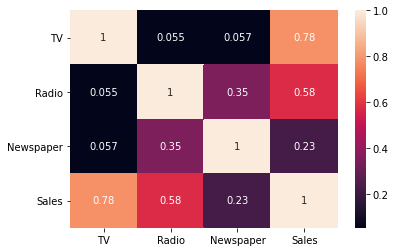

In [62]:
sns.heatmap(adv.corr(), annot=True)

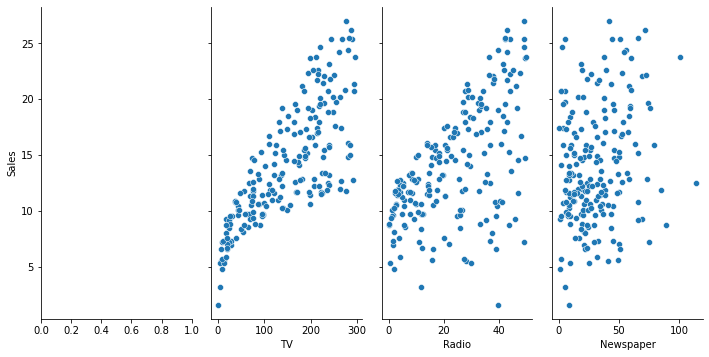

In [59]:

sns.pairplot(adv, x_vars=['','TV','Radio', 'Newspaper'], y_vars=['Sales'], height=5, aspect=0.5, kind='scatter')

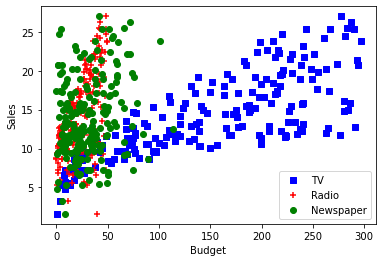

In [60]:
plt.scatter(x=adv.TV,y=adv.Sales,c='b',marker='s',label='TV')
plt.scatter(x=adv.Radio,y=adv.Sales,c='r',marker='+',label='Radio')
plt.scatter(x=adv.Newspaper,y=adv.Sales,c='g',marker='o',label='Newspaper')
plt.legend(numpoints=1)
plt.xlabel('Budget')
plt.ylabel('Sales')
plt.show()

/Users/mscsadmin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 28.27)

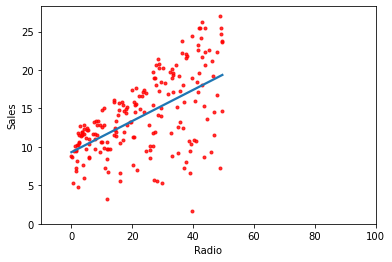

In [63]:
sns.regplot(adv.Radio, adv.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,100)
plt.ylim(ymin=0)

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

In [29]:
X = adv.Radio.values.reshape(-1,1)
y = adv.Sales.values
#X = adv[['Radio']]
#X.shape

/Users/mscsadmin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 28.27)

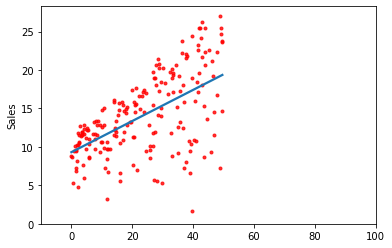

In [65]:
sns.regplot(X, adv.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,100)
plt.ylim(ymin=0)

In [67]:
#np.corrcoef(adv.Radio, adv.Sales)

In [32]:
# Split test and train: # default is 75%-25% train-test split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

# Linear Regression

In [69]:
lin_reg = LinearRegression().fit(X_train, y_train)


In [70]:
print('model coeff (w): {}'
     .format(lin_reg.coef_))
print('model intercept (b): {:.3f}'
     .format(lin_reg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(lin_reg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lin_reg.score(X_test, y_test)))

model coeff (w): [0.21348957]
model intercept (b): 9.388
R-squared score (training): 0.380
R-squared score (test): 0.148


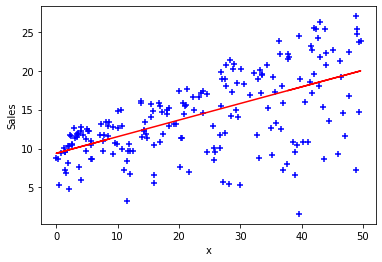

In [71]:
plt.scatter(X,y,c='b',marker='+',label='Radio')
plt.plot(X,lin_reg.coef_*X+lin_reg.intercept_,'-r')
plt.xlabel('x')
plt.ylabel('Sales')
plt.show()

In [84]:
y_pred=lin_reg.predict(X_test)
len(y_pred)

50

In [89]:
mean_squared_error(y_test, y_pred)

24.000792755485755

Text(0, 0.5, 'Sales')

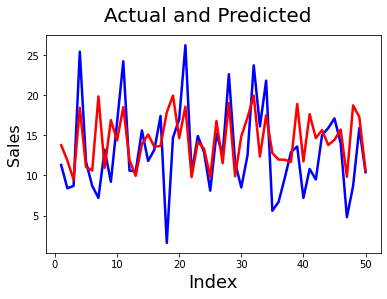

In [87]:


c = [i for i in range(1,51,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)



# Multiple Linear Regression


In [67]:
X = adv[['Radio', 'TV']]
y = adv['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)
lin_reg = LinearRegression().fit(X_train, y_train)

print('model coeffs (w): {}'
     .format(lin_reg.coef_))
print('model intercept (b): {:.3f}'
     .format(lin_reg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(lin_reg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lin_reg.score(X_test, y_test)))


model coeffs (w): [0.19946953 0.04419729]
model intercept (b): 2.911
R-squared score (training): 0.907
R-squared score (test): 0.858


In [68]:
import statsmodels.api as sm
Ols_reg = sm.OLS(y_train,X_train)
results = Ols_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              4516.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):                   2.23e-133
Time:                        06:06:45   Log-Likelihood:                         -311.86
No. Observations:                 150   AIC:                                      627.7
Df Residuals:                     148   BIC:                                      633.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Radio          0.2441      0.009     27.780      0.000       0.227       0.261
TV             0.0535      0.001     38.742      0.000       0.051       0.056
==============================================================================
Omnibus:                        4.756   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                4.630
Skew:                           0.430   Prob(JB):                       0.0988
Kurtosis:                       2.991   Cond. No.                         9.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
#$1,000 on radio advertising leads to an increase in sales by approximately 244 units.

In [70]:
X_all=adv[['Radio', 'TV','Newspaper']]
X_radio = adv.Radio.values.reshape(-1,1)
X_TV = adv.TV.values.reshape(-1,1)
X_newspaper = adv.Newspaper.values.reshape(-1,1)
y = adv.Sales.values
#.................................................
Ols_reg_all = sm.OLS(y,X_all)
results_all = Ols_reg_all.fit()
print(results_all.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):                   2.43e-171
Time:                        06:06:45   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [71]:
Ols_reg_radio = sm.OLS(y,X_radio)
results_radio = Ols_reg_radio.fit()
print(results_radio.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.807
Model:                            OLS   Adj. R-squared (uncentered):              0.806
Method:                 Least Squares   F-statistic:                              834.0
Date:                Tue, 20 Oct 2020   Prob (F-statistic):                    4.27e-73
Time:                        06:06:46   Log-Likelihood:                         -660.13
No. Observations:                 200   AIC:                                      1322.
Df Residuals:                     199   BIC:                                      1326.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [72]:
Ols_reg_TV = sm.OLS(y,X_TV)
results_TV = Ols_reg_TV.fit()
print(results_TV.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1733.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):                   3.52e-100
Time:                        06:06:46   Log-Likelihood:                         -597.51
No. Observations:                 200   AIC:                                      1197.
Df Residuals:                     199   BIC:                                      1200.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [73]:
Ols_reg_newspaper = sm.OLS(y,X_newspaper)
results_newspaper = Ols_reg_newspaper.fit()
print(results_newspaper.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.656
Model:                            OLS   Adj. R-squared (uncentered):              0.655
Method:                 Least Squares   F-statistic:                              379.9
Date:                Tue, 20 Oct 2020   Prob (F-statistic):                    4.98e-48
Time:                        06:06:46   Log-Likelihood:                         -718.04
No. Observations:                 200   AIC:                                      1438.
Df Residuals:                     199   BIC:                                      1441.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# RIDGE REGRESSION

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X_train)

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg_ridge = Ridge(alpha=100.0).fit(X_train_scaled, y_train)

print('ridge model intercept: {}'
     .format(reg_ridge.intercept_))
print('ridge model coeff:\n{}'
     .format(reg_ridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(reg_ridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(reg_ridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(reg_ridge.coef_ != 0)))

ridge model intercept: 14.351333333333335
ridge model coeff:
[1.81965018 2.27546538]
R-squared score (training): 0.771
R-squared score (test): 0.719
Number of non-zero features: 2


In [ ]:
from sklearn.linear_model import Ridge
reg_ridge = Ridge(alpha=10.0).fit(X_train, y_train)

print(reg_ridge.intercept_)
print(reg_ridge.coef_)
print(reg_ridge.score(X_train, y_train))
print(reg_ridge.score(X_test, y_test))

# LASSO

In [78]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=.1, max_iter = 10000).fit(X_train_scaled, y_train)


print('lasso model intercept: {}'
     .format(linlasso.intercept_))
print('lasso model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')


lasso model intercept: 8.192422299853508
lasso model coeff:
[ 0.          0.          3.84463877  0.04920989 15.4894169   0.        ]
Non-zero features: 3
R-squared score (training): 0.965
R-squared score (test): 0.937

Features with non-zero weight (sorted by absolute magnitude):


In [76]:
X


,Radio,TV
0,37.8,230.1
1,39.3,44.5
2,45.9,17.2
3,41.3,151.5
4,10.8,180.8
...,...,...
195,3.7,38.2
196,4.9,94.2
197,9.3,177.0
198,42.0,283.6


In [77]:

from sklearn.preprocessing import PolynomialFeatures

#transform the original input data to add polynomial features up to degree 2(quadratic))
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Reg_poly: linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('Reg_poly:linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('Reg_poly: R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('Reg_poly: R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

#To avoid overfitting use Ridge regression

linreg = Ridge().fit(X_train, y_train)

print('Reg_poly_ridge: linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('Reg_poly_ridge: linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('Reg_poly_ridge: R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('Reg_poly_ridge: R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Reg_poly: linear model coeff (w):
[ 0.          0.02692461  0.04989176  0.00028328  0.00104167 -0.000104  ]
Reg_poly:linear model intercept (b): 5.235
Reg_poly: R-squared score (training): 0.991
Reg_poly: R-squared score (test): 0.972

Reg_poly_ridge: linear model coeff (w):
[ 0.          0.02690917  0.04989037  0.00028352  0.00104169 -0.00010399]
Reg_poly_ridge: linear model intercept (b): 5.235
Reg_poly_ridge: R-squared score (training): 0.991
Reg_poly_ridge: R-squared score (test): 0.972
